<a href="https://colab.research.google.com/github/vssmarcos/ciencia-de-dados/blob/main/Analise_de_dados_ENEM_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Projeto de analise de dados - Microdados enem 2023
*    Autor: Marcos Vinícius Silva
*    Linkedin: www.linkedin.com/in/marcosvcss

In [1]:
import pandas as pd
import chardet
import seaborn as sns
import matplotlib.pyplot as plt
url = '/content/MICRODADOS_ENEM_2023.csv'

with open(url,'rb') as f:
  arquivo = f.read(1000)

result = chardet.detect(arquivo)
encoding = result['encoding']

microdados = pd.read_csv(url, encoding=encoding, sep=';')
microdados.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210059085136,2023,14,M,2,1,1,1,17,1,...,C,C,B,B,A,B,B,A,A,B
1,210059527735,2023,12,M,2,1,0,1,16,1,...,B,A,B,B,A,A,C,A,D,B
2,210061103945,2023,6,F,1,1,1,1,0,1,...,B,A,A,B,A,A,A,A,A,B
3,210060214087,2023,2,F,1,3,1,2,0,2,...,A,A,A,B,A,A,D,A,A,B
4,210059980948,2023,3,F,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,A,A


In [2]:
microdados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1591696 entries, 0 to 1591695
Data columns (total 76 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   NU_INSCRICAO            1591696 non-null  int64  
 1   NU_ANO                  1591696 non-null  int64  
 2   TP_FAIXA_ETARIA         1591696 non-null  int64  
 3   TP_SEXO                 1591696 non-null  object 
 4   TP_ESTADO_CIVIL         1591696 non-null  int64  
 5   TP_COR_RACA             1591696 non-null  int64  
 6   TP_NACIONALIDADE        1591696 non-null  int64  
 7   TP_ST_CONCLUSAO         1591696 non-null  int64  
 8   TP_ANO_CONCLUIU         1591696 non-null  int64  
 9   TP_ESCOLA               1591696 non-null  int64  
 10  TP_ENSINO               631079 non-null   float64
 11  IN_TREINEIRO            1591696 non-null  int64  
 12  CO_MUNICIPIO_ESC        422988 non-null   float64
 13  NO_MUNICIPIO_ESC        422988 non-null   object 
 14  CO

# **ANÁLISE 1: DESEMPENHO E ESCOLA**
Objetivo: Comparar notas dos estudantes com base no Tipo escola.
Com base nas regras de negócios os tipos são:<br>
1: Não informado (ignorado na analise)<br>
2: Escola Pública<br>
3: Escola particular<br>

In [3]:
analise1 = microdados[['TP_ESCOLA','NU_NOTA_REDACAO','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC','NU_NOTA_MT'  ] ]
analise1 = analise1.dropna()

analise1['MEDIA'] = analise1[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean(axis=1)
analise1 = analise1.loc[(analise1['TP_ESCOLA']==2) | (analise1['TP_ESCOLA']==3 )]
analise1['TP_ESCOLA'] = analise1['TP_ESCOLA'].replace({2:'Pública', 3:'Privada'})
analise1.head()

<ipython-input-3-574f7bcb22d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analise1['MEDIA'] = analise1[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean(axis=1)


,TP_ESCOLA,NU_NOTA_REDACAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,MEDIA
3,Pública,880.0,459.0,508.5,507.2,466.7,564.28
4,Pública,560.0,402.5,379.2,446.9,338.3,425.38
11,Pública,780.0,608.2,667.6,607.9,691.9,671.12
16,Pública,880.0,515.7,553.1,544.4,437.0,586.04
41,Pública,600.0,523.8,576.3,596.5,628.1,584.94


In [4]:
media_geral = analise1['MEDIA'].mean()
print(f'A media geral de todos os estudantes que informaram o tipo da escola é: {media_geral}')

A media geral de todos os estudantes que informaram o tipo da escola é: 536.9313484008237


A diferença interquartil (IQR) é a medida de dispersão entre o 1º quartil (Q1) e o 3º quartil (Q3), ou seja, IQR = Q3 - Q1. Ela indica a faixa central onde estão os 50% médios dos dados e é usada para detectar outliers.<br>
Os limites inferiores e superiores são tomados com base no número Q3/Q1 +- 1.5* IQR

In [5]:
#Diferença interquartil
Q1 = analise1['MEDIA'].quantile(0.25)
Q3 = analise1['MEDIA'].quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5*IQR
print(f'Todos os valores abaixo de {lim_inf.round(2)} são considerados outliers baixos')
lim_sup = Q3 + 1.5*IQR
print(f'Todos os valores acima de {lim_sup.round(2)} são considerados outliers de cima')

Todos os valores abaixo de 280.45 são considerados outliers baixos
Todos os valores acima de 795.09 são considerados outliers de cima


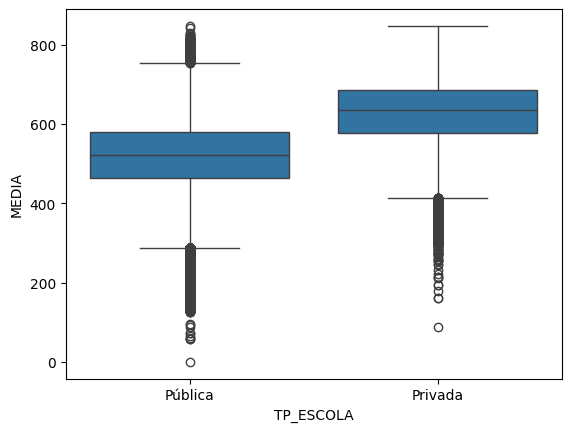

In [6]:
boxplot = sns.boxplot(x='TP_ESCOLA', y='MEDIA', data=analise1)

É claro notar que estudantes de escolas particulares possuem notas melhores notas na maioria dos casos. Trazendo essa visualização para numero de médias, temos as respectivas médias conforme abaixo

In [7]:
df_pub = analise1.loc[analise1['TP_ESCOLA'] == 'Pública']
media_pub = df_pub['MEDIA'].mean()
print(f'Media geral dos estudantes de escola pública: {media_pub}')

Media geral dos estudantes de escola pública: 520.1043201341722


In [8]:
df_par = analise1.loc[analise1['TP_ESCOLA'] == 'Privada']
media_par = df_par['MEDIA'].mean()
print(f'Media geral dos estudantes de escola particular: {media_par}')

Media geral dos estudantes de escola particular: 627.1060309390135


# **ANÁLISE 2: RENDA E DESEMPENHO**
com base nos dados do Enem 2023, disponíveis no site do Ministério da Educação, foi feita uma análise para verificar a relação entre a renda mensal familiar dos candidatos e o desempenho deles no exame. As informações sobre a renda foram obtidas no questionário socioeconômico, na questão 6 (Q006). De acordo com as respostas dos participantes, eles foram divididos em 17 categorias - de A a Q -, em que a categoria A corresponde à menor faixa de renda e Q à maior.

In [9]:
#tirando numero de inscrição e ano
analise2 = microdados.drop(['NU_INSCRICAO', 'NU_ANO'], axis=1)
#Descartando valores nulos e vazios
analise2.dropna(inplace= True)
#Renomeando colunas para analise futura
analise2.rename({"NU_NOTA_CN": "Ciências da Natureza",
            "NU_NOTA_CH": "Ciências Humanas",
            "NU_NOTA_LC": "Linguagens",
            "NU_NOTA_MT": "Matemática",
            "NU_NOTA_REDACAO": "Redação"}, axis = 1, inplace=True)

notas = ["Ciências da Natureza", "Ciências Humanas","Linguagens", "Matemática","Redação"]
#Transformando cada faixa de renda em uma categoria diferente
analise2["Q006"] = pd.Categorical(analise2["Q006"],ordered= True)
#Fazendo a média de cada área do conhecimento com base em cada faixa de renda
notas_por_renda = analise2.groupby("Q006")[notas].mean()

round(notas_por_renda,2)


<ipython-input-9-5f805be6498d>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  notas_por_renda = analise2.groupby("Q006")[notas].mean()


,Ciências da Natureza,Ciências Humanas,Linguagens,Matemática,Redação
Q006,,,,,
A,450.09,474.93,475.04,462.93,552.18
B,461.76,490.56,490.26,483.78,586.18
C,481.20,514.98,513.21,519.53,631.13
D,493.39,528.48,524.89,540.19,655.90
E,503.34,538.51,533.28,557.69,677.97
F,512.40,547.80,541.05,575.30,694.79
G,522.37,556.35,547.79,590.91,712.23
H,535.07,567.94,556.74,612.91,735.44
I,541.07,573.87,561.15,622.76,749.14


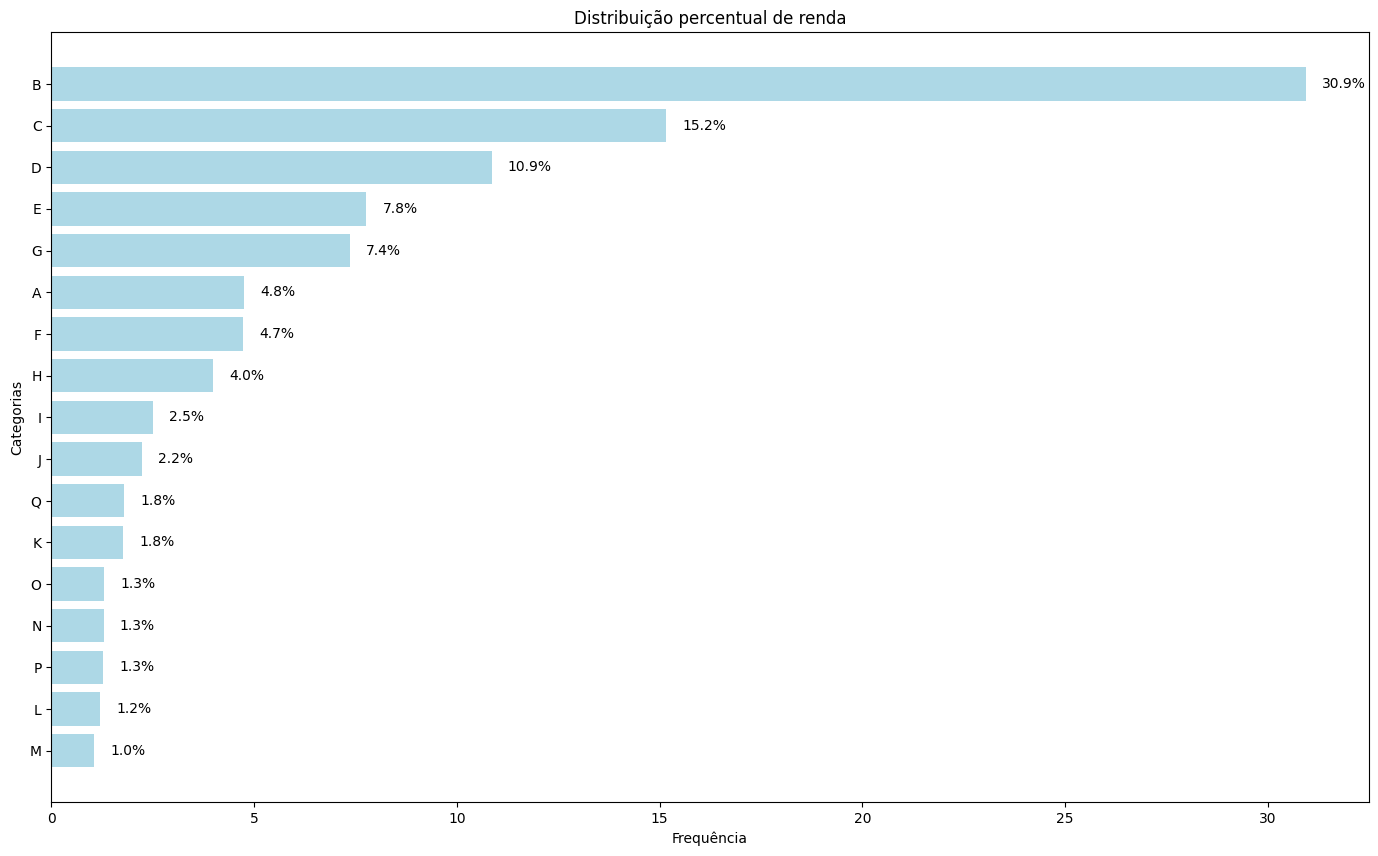

In [10]:
#Frequencia das classes

frequencia = analise2['Q006'].value_counts()
percentual = (frequencia/frequencia.sum())*100
percentual.sort_values(ascending= False)
#Criando grafico
plt.figure(figsize=(17,10))

grafico = plt.barh(percentual.index, percentual.values, color='lightblue')
#Para cada valor no grafico pegamos a posição no eixo x, y e colocamos um valor
#que representa a porcentagem de cada classe
for bar, value in zip(grafico, percentual.values):
    plt.text(
        bar.get_width() + 0.4,  # Posição no eixo X
        bar.get_y() + bar.get_height() / 2,  # Centraliza no eixo Y
        f"{value:.1f}%",  # Formato do valor percentual
        va="center"  # Alinha verticalmente
    )
plt.xlabel('Frequência')
plt.ylabel('Categorias')
plt.title('Distribuição percentual de renda')
plt.gca().invert_yaxis()
plt.show()

Do gráfico de barras horizontais, observa-se que a maior parte dos candidados - 68,5 % - pertencem às categorias B, C, D, G e E. Nelas a renda mensal está no intervalo de R$1320 a R$ 5280 . As famílias que ganham mais de R$ 10.560 (de L a Q) possuem distribuições semelhantes. As classes são dadas por:



*   A: Nenhuma renda
*   B: Até 1320 reais
*   C: de B até 1980 reais
*   D: de C até 2640 reais
*   E: de D até 3300 reais
*   F: de E até 3960 reais
*   G: de F até 5280 reais
*   H: de G até 6600 reais
*   I: de H até 7920 reais
*   J: de I até 9240 reais
*   K: de J até 10560 reais
*   L: de K até 11880 reais
*   M: de L até 13200 reais
*   N: de M até 15840 reais
*   O: de N até 19800 reais
*   P: de O até 26400 reais
*   Q: acima de 26400 reais



In [13]:
notas_por_renda.head()

,Ciências da Natureza,Ciências Humanas,Linguagens,Matemática,Redação
Q006,,,,,
A,450.087440,474.928391,475.042050,462.930496,552.183523
B,461.757832,490.559218,490.262776,483.783551,586.176762
C,481.200154,514.979277,513.211318,519.525315,631.127547
D,493.387844,528.475587,524.891077,540.186574,655.902317
E,503.339599,538.510086,533.280793,557.693859,677.969142


In [17]:
notas_long = notas_por_renda.reset_index().melt(id_vars="Q006",
                                                var_name="Tipo de Nota",
                                                value_name="Média")
notas_long.head()

,Q006,Tipo de Nota,Média
0,A,Ciências da Natureza,450.087440
1,B,Ciências da Natureza,461.757832
2,C,Ciências da Natureza,481.200154
3,D,Ciências da Natureza,493.387844
4,E,Ciências da Natureza,503.339599


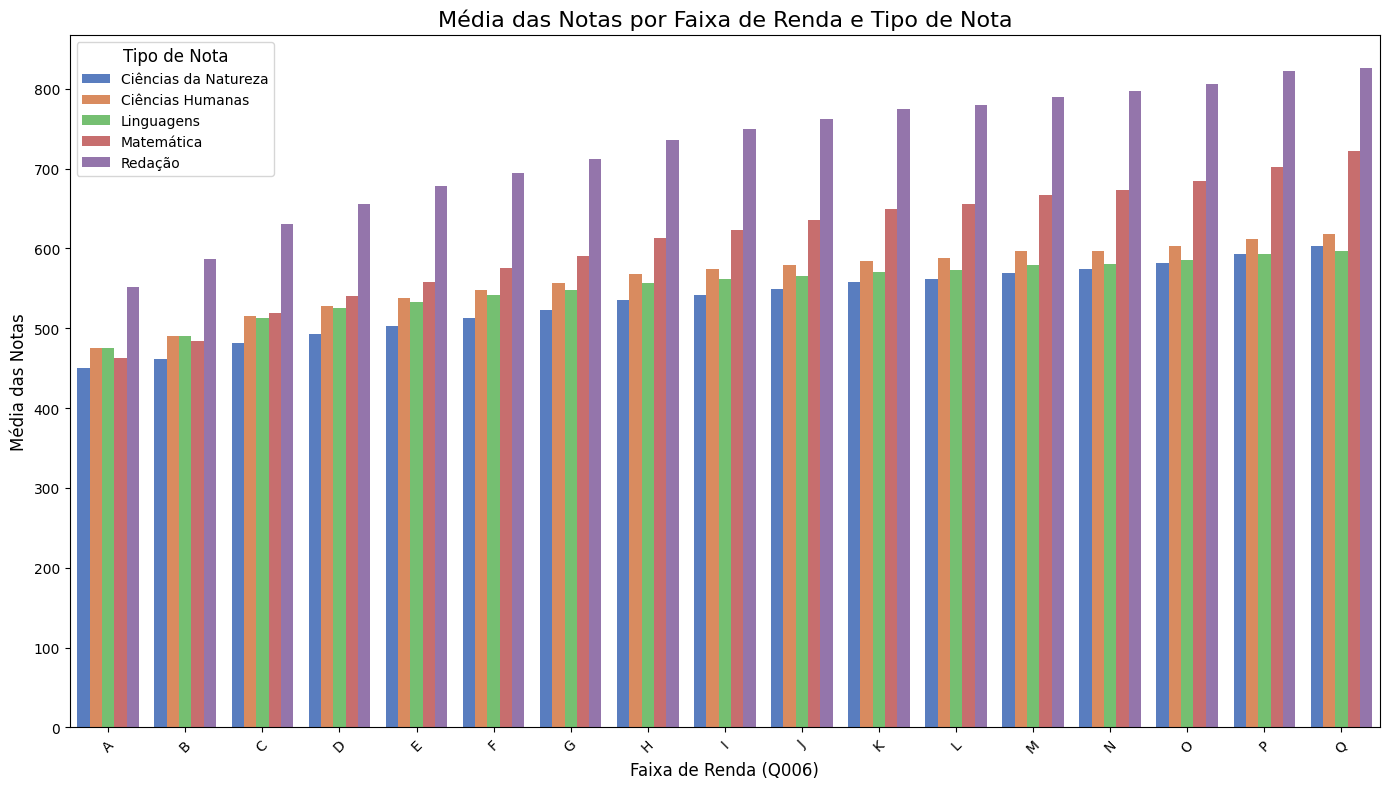

In [12]:
#Criando grafico
plt.figure(figsize=(14, 8))
sns.barplot(data=notas_long, x="Q006", y="Média", hue="Tipo de Nota", palette="muted")

plt.title("Média das Notas por Faixa de Renda e Tipo de Nota", fontsize=16)
plt.xlabel("Faixa de Renda (Q006)", fontsize=12)
plt.ylabel("Média das Notas", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Tipo de Nota", fontsize=10, title_fontsize=12)
plt.tight_layout()

plt.show()

Do gráfico e da tabela, observa-se que os alunos das categorias A,B,C e D possuem a nota menor do que a média em todas as áreas. Essa padrão é alterado a partir da E. Conforme a maior renda mensal, é perceptivel o aumento das notas médias - sobretudo- em matemática e redação.